In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("muted")

In [112]:
ds = pd.read_csv("../data/_clean_books.csv", index_col=0)
ds.head(1)

,book_authors,book_title,original_title,genres,book_desc,book_edition,book_format,book_pages,original_publication_year,book_rating,book_rating_count,book_review_count,book_id,goodreads_book_id
0,Harper Lee,To Kill a Mockingbird,To Kill a Mockingbird,Literature and fiction|History|Education and T...,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,324 pages,1960.0,4.27,3745197,79450,4,2657


## Which kind of books have higher ratings on average?

### Relation between ratings and genre

In [113]:
ds["genres"] = ds["genres"].str.split("|")
genres = list(set([g for genre in ds["genres"] for g in genre]))
genres

['Mystery, thriller, suspense and horror',
 'Comics and graphic novels',
 'Parenting and relationships',
 'Self-Help',
 'Poetry',
 'Business and money',
 'Childrens',
 'Science fiction and fantasy',
 'Romance',
 'Personal development',
 'Art',
 'Health and fitness',
 'Autobiography and biography',
 'Crafts, Hobbies and Home',
 'Literature and fiction',
 'Medical books',
 'Education and Teaching',
 'Sports and outdoors',
 'Teen and young adult',
 'History',
 'Computers and technology',
 'Humor and Entertainment',
 'Religion and spirituality',
 'Maths and science',
 'Law',
 'Cookbooks, Food and Wine',
 'Anthology',
 'Politics and social sciences',
 'Reference',
 'Engineering and Transportation',
 'Horror and mystery',
 'Travel',
 'LGBTQ and gender studies',
 'Action and adventure']

AttributeError: 'NoneType' object has no attribute 'set_title'

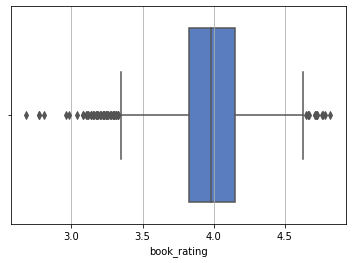

In [114]:
y = [np.mean(ds[ds["genres"].str.contains(g, regex=False)]["book_rating"]) for g in genres]

sns.boxplot(ds["book_rating"]).xaxis.grid(True).set_title("Rating")

In [ ]:
y = [ds[ds["genres"].str.contains(g, regex=False)]["book_rating"] for g in genres]

ax = sns.boxplot(data=y)
fig = plt.gcf()
fig.set_size_inches(11,8)
ax.set_ylim([-0.5,5.5])
ax.set_xticklabels([])


### Relation between ratings and number of pages

In [ ]:
ds_pag = ds.copy()
ds_pag["book_pages"] = ds_pag["book_pages"].str.replace(" pages", "")
ds_pag.dropna(axis=0, subset=["book_pages"], inplace=True)
ds_pag["book_pages"] = ds_pag["book_pages"].astype("int64")
ds_pag.sort_values(by="book_pages", inplace=True)

ds_pag.plot.scatter(x="book_pages", y="book_rating", alpha=0.1)

### Relation between ratings and book format

In [ ]:
ds_format = ds.dropna(axis=0, subset=["book_format"]).copy()
ds_format["book_format"].unique()
formats={'Paperback':'Paperback', 'Mass Market Paperback':'Paperback', 'Hardcover':'Hardcover',
       'Kindle Edition':'ebook', 'ebook':'ebook', 'Library Binding':'Hardcover', 'Vinyl Cover':'Hardcover',
       'Leather Bound':'Hardcover', 'Capa mole':'Paperback', 'Audio':'Audiobook', 'Audio Cassette':'Audiobook',
       'Audiobook':'Audiobook', 'Audio CD':'Audiobook', 'Capa comum':'Paperback', 'Unknown Binding':'Unknown',
       'Board book':'Hardcover', 'Slipcased Hardcover':'Hardcover', 'Audible Audio':'Audiobook',
       'Trade Paperback':'Paperback', 'Nook':'ebook', 'Textbook Binding':'Hardcover', 'Board Book':'Hardcover',
       'paper':'Paperback', 'Comic':'Paperback', 'Flexibound':'Hardcover', 'Hardcover, Case bound':'Hardcover',
       'Hardcover-spiral':'Hardcover', 'audio cassette':'Audiobook'}
ds_format["book_format_simple"] = ds_format["book_format"].map(lambda x: formats[x])

plt.scatter(ds_format["book_format_simple"], ds_format["book_rating"], alpha=0.1)

### Relation between ratings and year published

In [ ]:
ds_yr = ds.dropna(axis=0, subset=["original_publication_year"]).copy()
ds_yr.sort_values(by="original_publication_year", inplace=True)

plt.scatter(ds_yr["original_publication_year"], ds_yr["book_rating"], alpha=0.1)

## Which kind of books have higher rating counts on average?

### Relation between rating counts and genre

<BarContainer object of 10 artists>

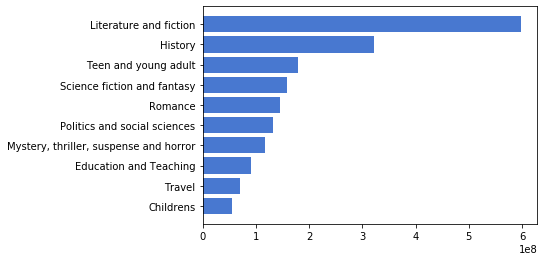

In [159]:
y = [np.sum(ds[ds["genres"].str.contains(g, regex=False)]["book_rating_count"]) for g in genres]

lst = list(zip(genres, y))
lst.sort(key=lambda x: x[1])

x = [i[0] for i in lst]
y = [i[1] for i in lst]

plt.barh(x[-10:], y[-10:])

[Text(0, 0, 'Mystery, thriller, suspense and horror'),
 Text(0, 0, 'Politics and social sciences'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Science fiction and fantasy'),
 Text(0, 0, 'Teen and young adult'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Literature and fiction')]

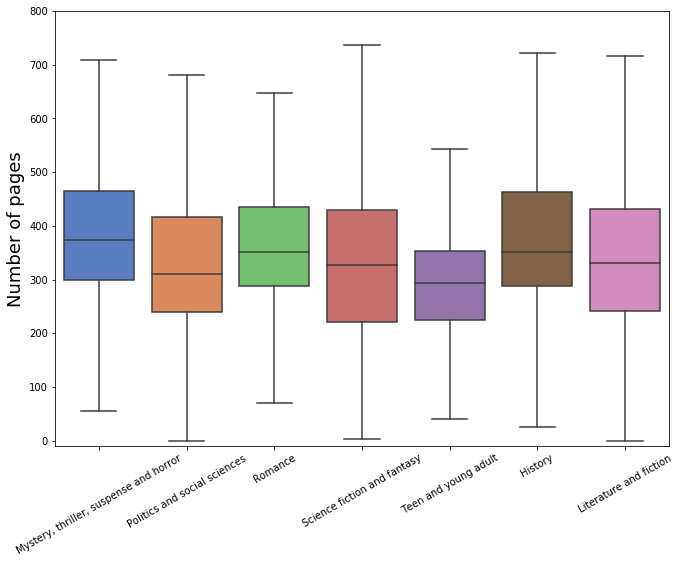

In [164]:
y = [ds_pag[ds_pag["genres"].str.contains(g, regex=False)]["book_pages"] for g in x[-7:]]

ax = sns.boxplot(data=y, fliersize=False)
fig = plt.gcf()
fig.set_size_inches(11,8)
ax.set_ylabel("Number of pages", fontsize=18)
ax.set_ylim([-10,800])
ax.set_xticklabels(x[-7:], rotation=30)

### Relation between rating counts and number of pages

In [ ]:
ds_pag.plot.scatter(x="book_pages", y="book_rating_count", alpha=0.1)

In [ ]:
ds_pag["book_pages"].hist(bins=100).grid(False)

### Relation between rating counts and book format

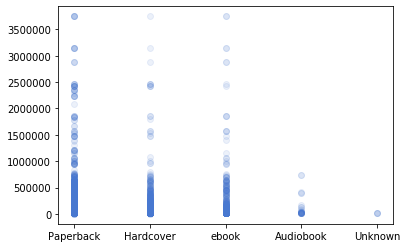

In [116]:
plt.scatter(ds_format["book_format_simple"], ds_format["book_rating_count"], alpha=0.1)

<BarContainer object of 4 artists>

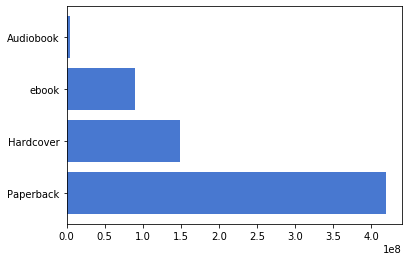

In [120]:
x = ds_format["book_format_simple"].unique()
y = [np.sum(ds_format[ds_format["book_format_simple"]==f]["book_rating_count"]) for f in x]

plt.barh(x[:-1], y[:-1])

### Relation between rating counts and year published

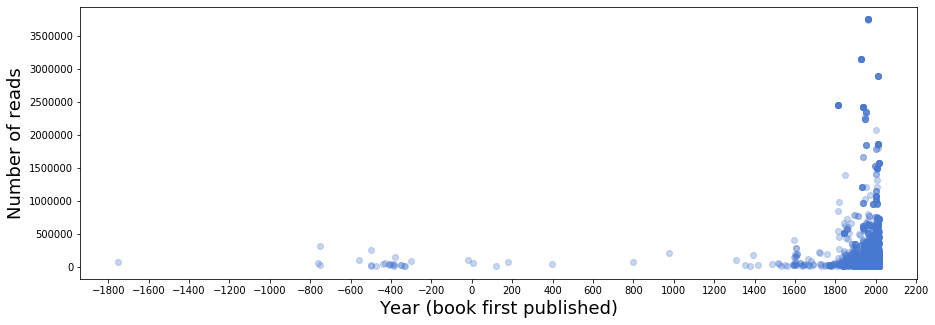

In [166]:
plt.scatter(data=ds_yr, x="original_publication_year", y="book_rating_count", alpha=0.3)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.ylabel("Number of reads", fontsize=18)
plt.xlabel("Year (book first published)", fontsize=18)
plt.locator_params(axis='x', nbins=30)

## Do authors who write more have better ratings?

In [13]:
ds_au = ds.groupby("book_authors", as_index=False).agg({"book_title":"count", "book_rating_count":"mean", "book_rating":"mean"})
ds_au.sort_values(by="book_title", ascending=True, inplace=True)

Text(0.5, 0, 'Amount of books published')

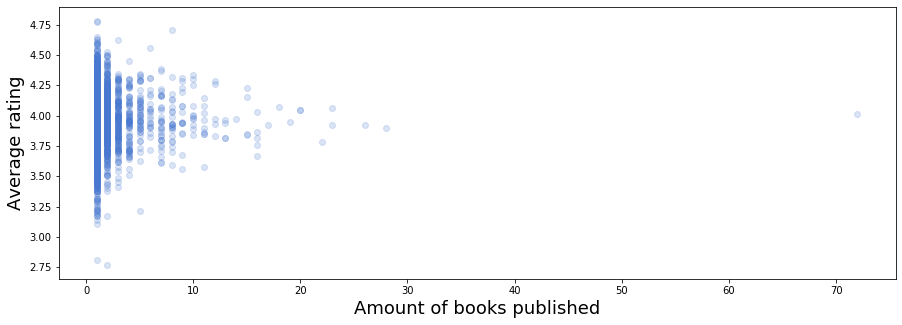

In [168]:
plt.scatter(data=ds_au, x="book_title", y="book_rating", alpha=0.2)#, hue="book_rating_count")
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.ylabel("Average rating", fontsize=18)
plt.xlabel("Amount of books published", fontsize=18)

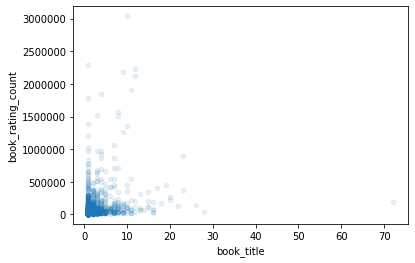

In [15]:
ds_au.plot.scatter(x="book_title", y="book_rating_count", alpha=0.1)

In [16]:
ds_au

,book_authors,book_title,book_rating_count,book_rating
0,A.J. Jacobs,1,56834.000000,3.760000
1550,Lisa Jewell,1,19592.000000,3.880000
1547,Linwood Barclay,1,14104.000000,4.000000
1546,Lindsey Kelk,1,11576.000000,3.940000
1543,Lin-Manuel Miranda|Jeremy McCarter,1,32924.000000,4.480000
...,...,...,...,...
866,Gillian Flynn,23,890136.260870,3.922609
1992,Rainbow Rowell,23,374951.130435,4.062609
1231,Jodi Picoult,26,141947.846154,3.919231
568,Dean Koontz,28,40375.678571,3.899643
